In [1]:
"""
#Based on the work of https://github.com/walissonsilva/wavelet-neural-network
#Modified by https://github.com/mk123qwe/wavelet-neural-network/
#add python 3 compability
"""

import matplotlib.pyplot as plt  # Para plotar graficos
import numpy as np  # Array do Python
from math  import sqrt, pi

class WNN(object):
    def __init__(self, eta=0.008, epoch_max=50000, Ni=1, Nh=40, Ns=1):
        ### Inicializando parametros
        self.eta = eta
        self.epoch_max = epoch_max
        self.Ni = Ni
        self.Nh = Nh
        self.Ns = Ns
        self.Aini = 0.01

    def load_first_function(self):
        x = np.arange(-6, 6, 0.15)
        self.N = x.shape[0]
        xmax = np.max(x)

        self.X_train = x / xmax
        #self.d = 1 / (1 + np.exp(-1 * x))*(np.cos(x) - np.sin(x))
        self.d = np.sin(x)

    def sig_dev2(self, theta):
        return 2*(1 / (1 + np.exp(-theta)))**3 - 3*(1 / (1 + np.exp(-theta)))**2 + (1 / (1 + np.exp(-theta)))

    def sig_dev3(self, theta):
        return -6*(1 / (1 + np.exp(-theta)))**4 + 12*(1 / (1 + np.exp(-theta)))**3 - 7*(1 / (1 + np.exp(-theta)))**2 + (1 / (1 + np.exp(-theta)))

    def sig_dev4(self, theta):
        return 24*(1 / (1 + np.exp(-theta)))**5 - 60*(1 / (1 + np.exp(-theta)))**4 + 50*(1 / (1 + np.exp(-theta)))**3 - 15*(1 / (1 + np.exp(-theta)))**2 + (1 / (1 + np.exp(-theta)))
    
    def sig_dev5(self, theta):
        return -120*(1 / (1 + np.exp(-theta)))**6 + 360*(1 / (1 + np.exp(-theta)))**5 - 390*(1 / (1 + np.exp(-theta)))**4 + 180*(1 / (1 + np.exp(-theta)))**3 - 31*(1 / (1 + np.exp(-theta)))**2 + (1 / (1 + np.exp(-theta)))
    
    def train(self):
        ### Inicializando os pesos
        self.A = np.random.rand(self.Ns, self.Nh) * self.Aini

        ### Inicializando os centros
        self.t = np.zeros((1, self.Nh))

        idx = np.random.permutation(self.Nh)
        for j in range(self.Nh):
            self.t[0,j] = self.d[idx[j]]
        
        ### Inicializando as larguras
        self.R = abs(np.max(self.t) - np.min(self.t)) / 2

        MSE = np.zeros(self.epoch_max)
        plt.ion()

        for epoca in range(self.epoch_max):
            z = np.zeros(self.N)
            E = np.zeros(self.N)

            index = np.random.permutation(self.N)

            for i in index:
                xi = self.X_train[i]#np.array([self.X_train[i]]).reshape(1, -1)
                theta = (xi - self.t) / self.R
                yj = self.sig_dev2(theta)
                z[i] = np.dot(self.A, yj.T)[0][0]

                e = self.d[i] - z[i]
                self.A = self.A + (self.eta * e * yj)
                self.t = self.t - (self.eta * e * self.A / self.R * self.sig_dev3(theta))
                self.R = self.R - (((self.eta * e * self.A * (xi - self.t)) / self.R**2) * self.sig_dev3(theta))

                E[i] = 0.5 * e**2

            MSE[epoca] = np.sum(E) / self.N

            if (epoca % 200 == 0 or epoca == self.epoch_max - 1):
                if (epoca != 0):
                    plt.cla()
                    plt.clf()
                
                self.plot(z, epoca)
        
        print(MSE[-1])

        plt.ioff()
        plt.figure(1)
        plt.title('Mean Square Error (MSE)')
        plt.xlabel('Training Epochs')
        plt.ylabel('MSE')
        plt.plot(np.arange(0, MSE.size), MSE)
        plt.show()

    def plot(self, saida, epoca):
        plt.figure(0)
        y, = plt.plot(self.X_train, saida, label="y")
        d, = plt.plot(self.X_train, self.d, '.', label="d")
        plt.legend([y, d], ['WNN Output', 'Desired Value'])
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.text(np.min(self.X_train) - np.max(self.X_train) * 0.17  , np.min(self.d) - np.max(self.d) * 0.17, 'Progress: ' + str(round(float(epoca) / self.epoch_max * 100, 2)) + '%')
        plt.axis([np.min(self.X_train) - np.max(self.X_train) * 0.2, np.max(self.X_train) * 1.2, np.min(self.d) - np.max(self.d) * 0.2, np.max(self.d) * 1.4])
        plt.show()
        plt.pause(1e-100)

    def show_function(self):
        plt.figure(0)
        plt.title('Function')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.plot(self.X_train, self.d)
        plt.show()

wnn = WNN()

wnn.load_first_function()
wnn.train()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

2.3671532933389958e-05


<Figure size 640x480 with 1 Axes>

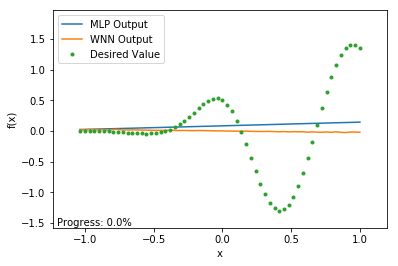

<Figure size 432x288 with 0 Axes>

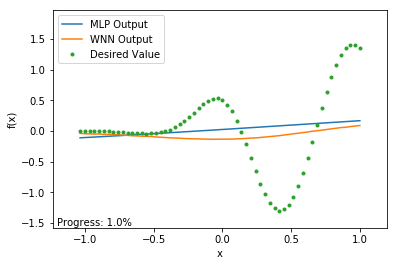

<Figure size 432x288 with 0 Axes>

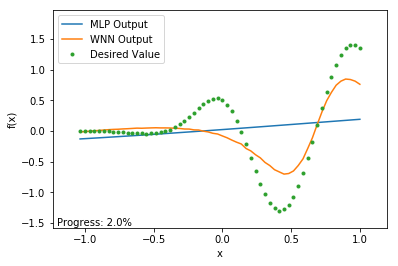

<Figure size 432x288 with 0 Axes>

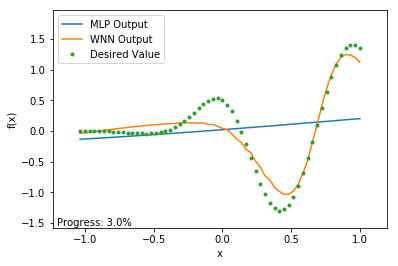

<Figure size 432x288 with 0 Axes>

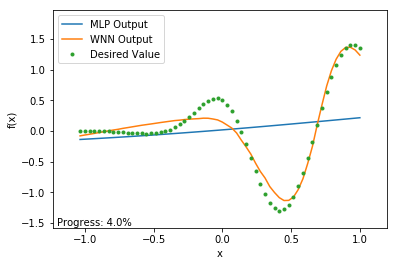

<Figure size 432x288 with 0 Axes>

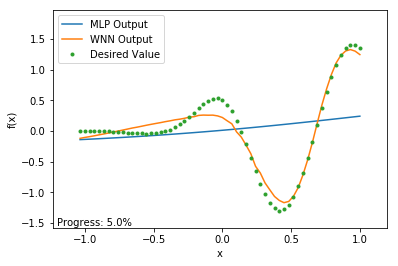

<Figure size 432x288 with 0 Axes>

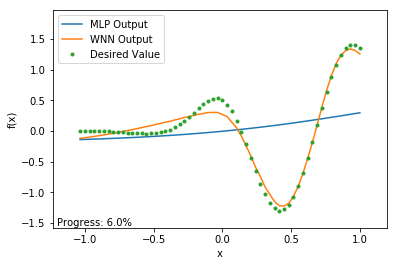

<Figure size 432x288 with 0 Axes>

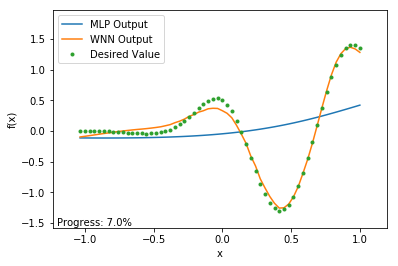

<Figure size 432x288 with 0 Axes>

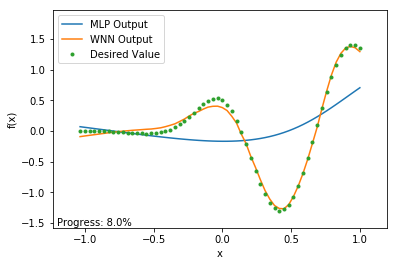

<Figure size 432x288 with 0 Axes>

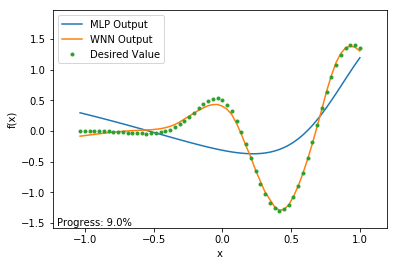

<Figure size 432x288 with 0 Axes>

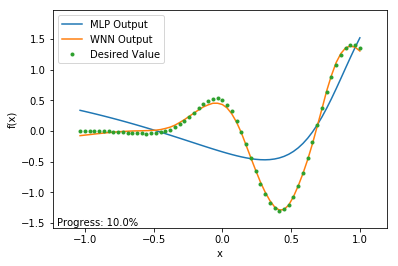

<Figure size 432x288 with 0 Axes>

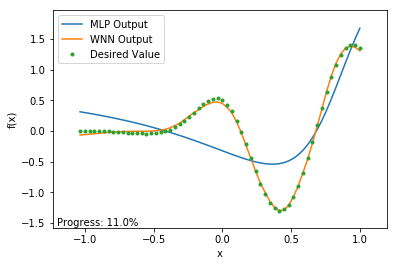

<Figure size 432x288 with 0 Axes>

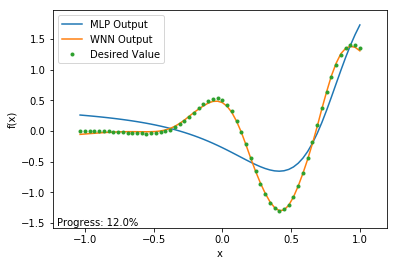

<Figure size 432x288 with 0 Axes>

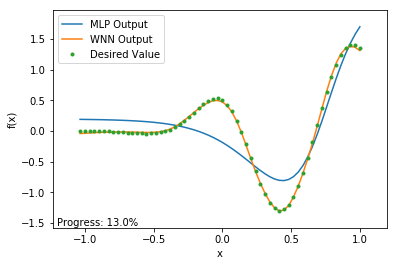

<Figure size 432x288 with 0 Axes>

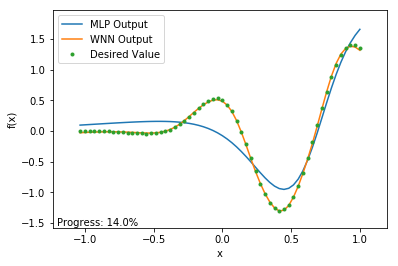

<Figure size 432x288 with 0 Axes>

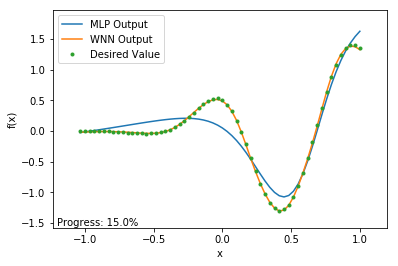

<Figure size 432x288 with 0 Axes>

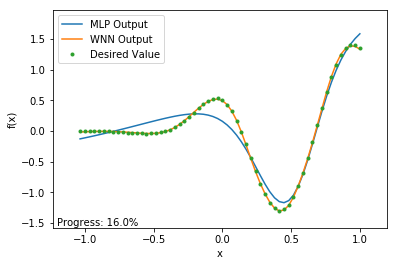

<Figure size 432x288 with 0 Axes>

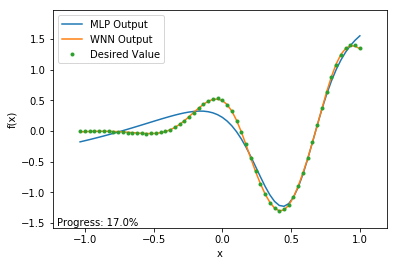

<Figure size 432x288 with 0 Axes>

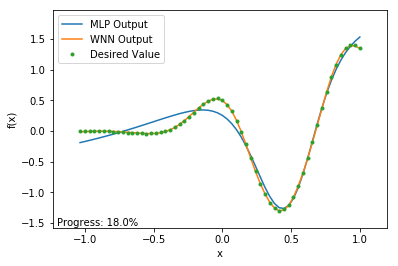

<Figure size 432x288 with 0 Axes>

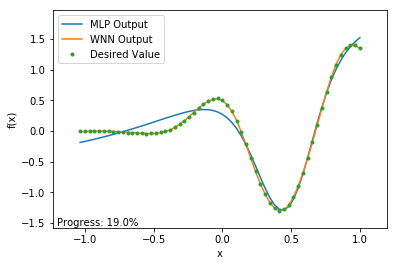

<Figure size 432x288 with 0 Axes>

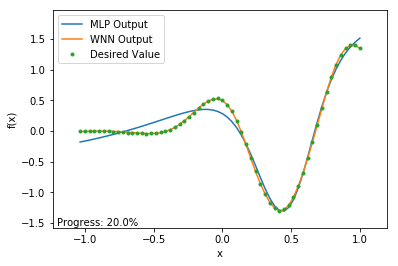

<Figure size 432x288 with 0 Axes>

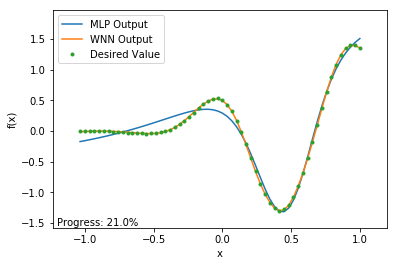

<Figure size 432x288 with 0 Axes>

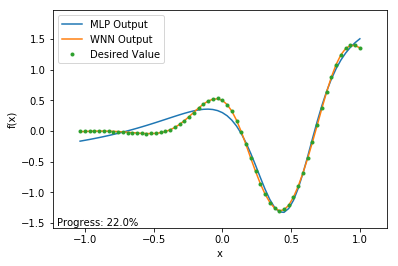

<Figure size 432x288 with 0 Axes>

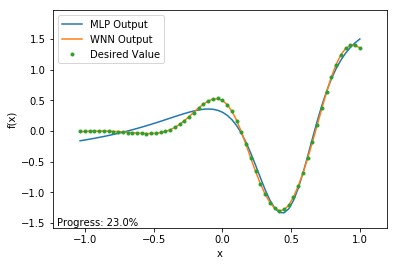

<Figure size 432x288 with 0 Axes>

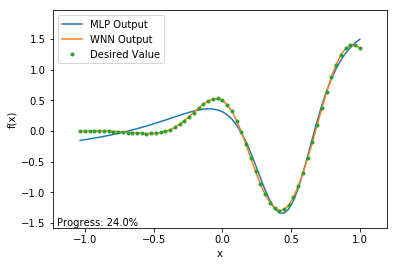

<Figure size 432x288 with 0 Axes>

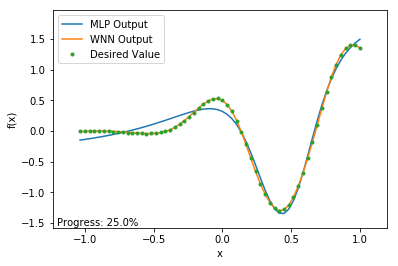

<Figure size 432x288 with 0 Axes>

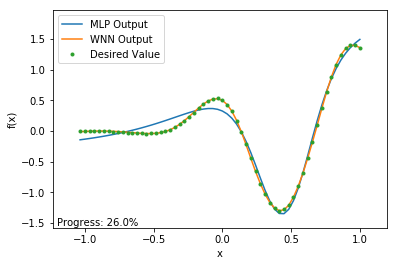

<Figure size 432x288 with 0 Axes>

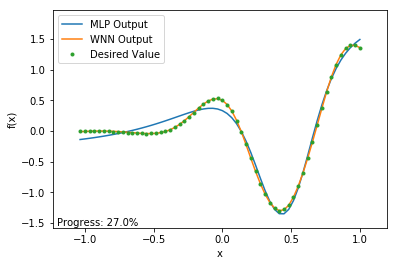

<Figure size 432x288 with 0 Axes>

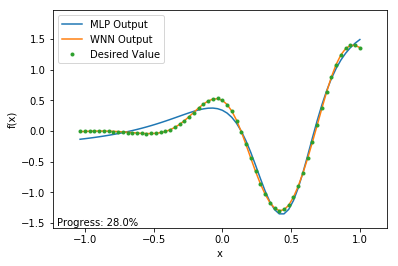

<Figure size 432x288 with 0 Axes>

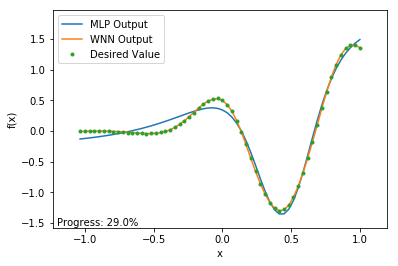

<Figure size 432x288 with 0 Axes>

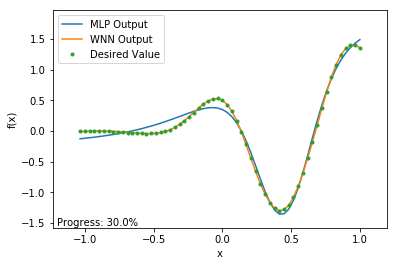

<Figure size 432x288 with 0 Axes>

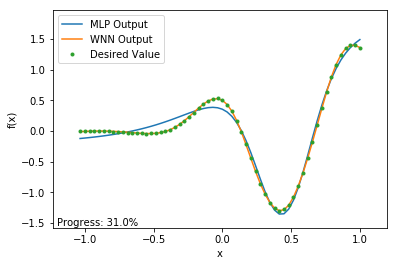

<Figure size 432x288 with 0 Axes>

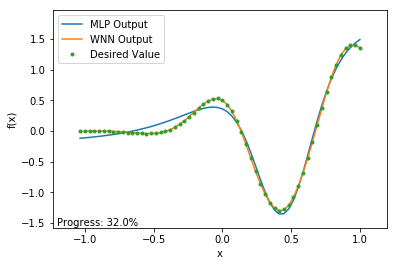

<Figure size 432x288 with 0 Axes>

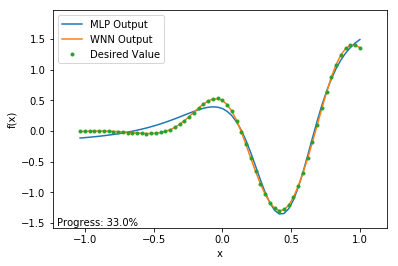

<Figure size 432x288 with 0 Axes>

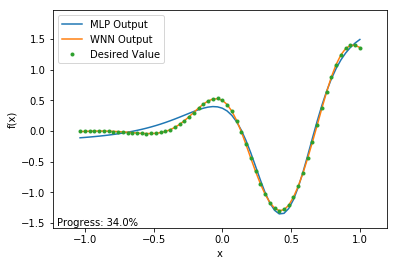

<Figure size 432x288 with 0 Axes>

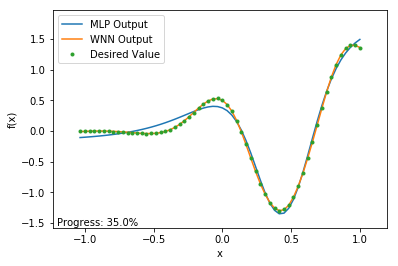

<Figure size 432x288 with 0 Axes>

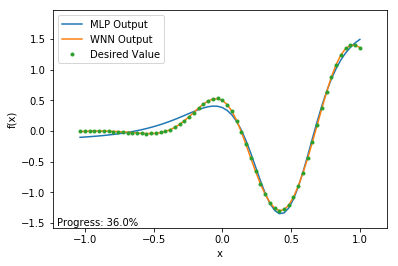

<Figure size 432x288 with 0 Axes>

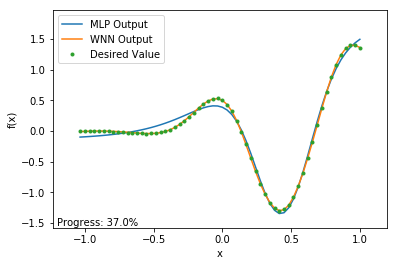

<Figure size 432x288 with 0 Axes>

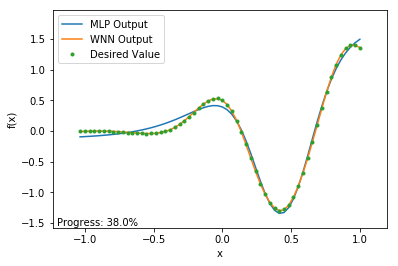

<Figure size 432x288 with 0 Axes>

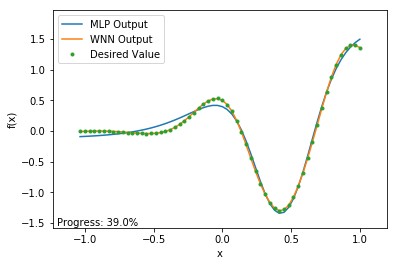

<Figure size 432x288 with 0 Axes>

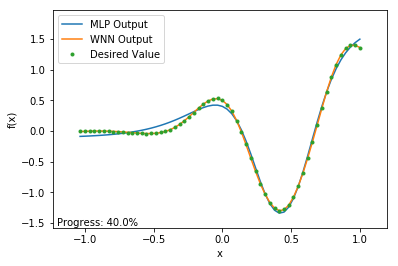

<Figure size 432x288 with 0 Axes>

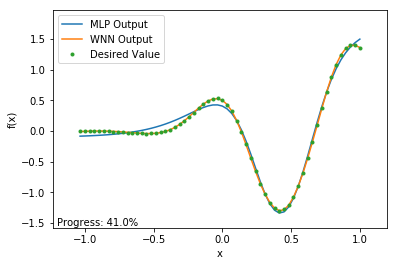

<Figure size 432x288 with 0 Axes>

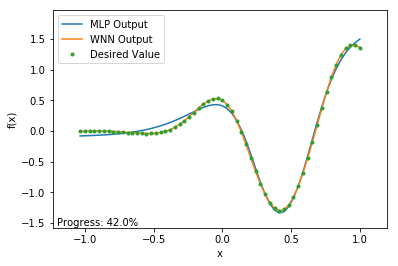

<Figure size 432x288 with 0 Axes>

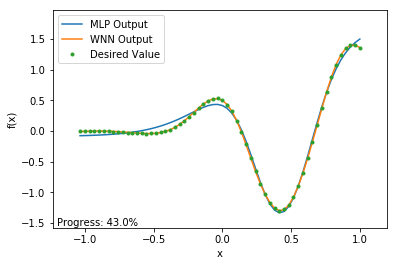

<Figure size 432x288 with 0 Axes>

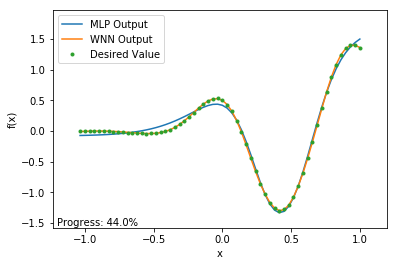

<Figure size 432x288 with 0 Axes>

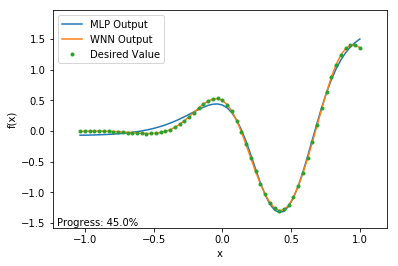

<Figure size 432x288 with 0 Axes>

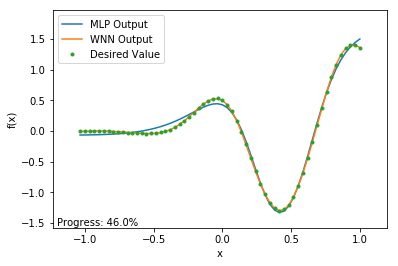

<Figure size 432x288 with 0 Axes>

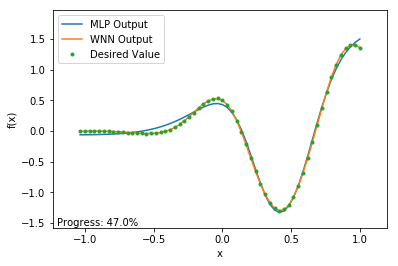

<Figure size 432x288 with 0 Axes>

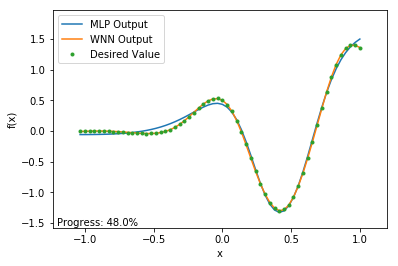

<Figure size 432x288 with 0 Axes>

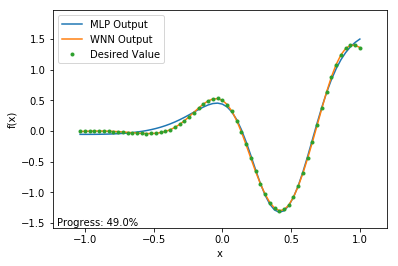

<Figure size 432x288 with 0 Axes>

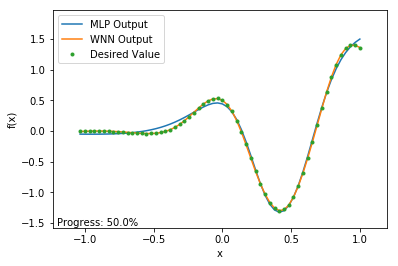

<Figure size 432x288 with 0 Axes>

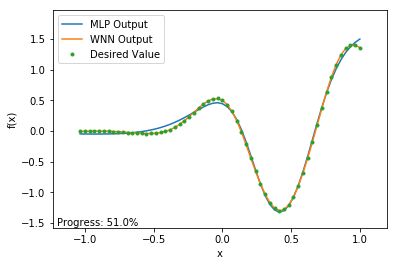

<Figure size 432x288 with 0 Axes>

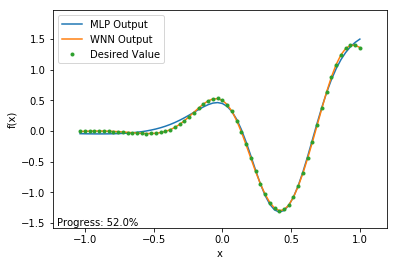

<Figure size 432x288 with 0 Axes>

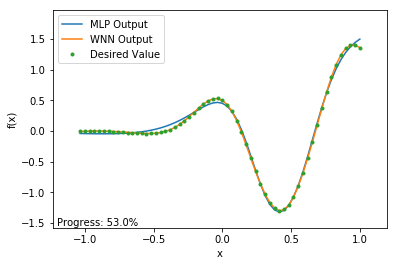

<Figure size 432x288 with 0 Axes>

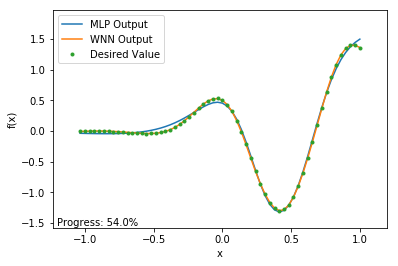

<Figure size 432x288 with 0 Axes>

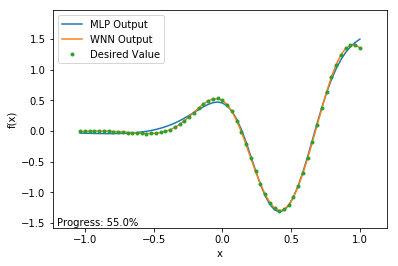

<Figure size 432x288 with 0 Axes>

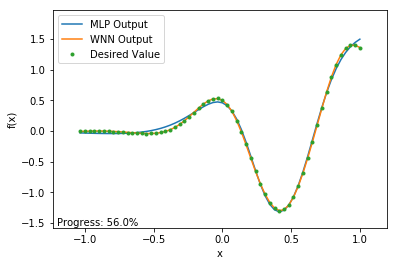

<Figure size 432x288 with 0 Axes>

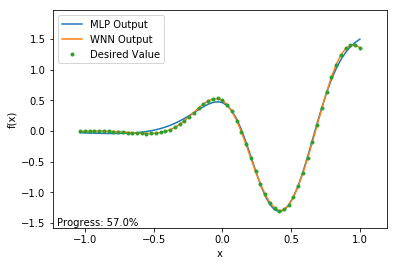

<Figure size 432x288 with 0 Axes>

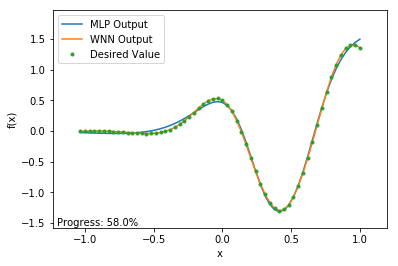

<Figure size 432x288 with 0 Axes>

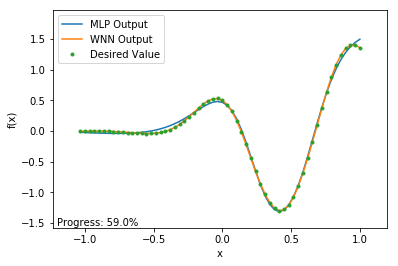

<Figure size 432x288 with 0 Axes>

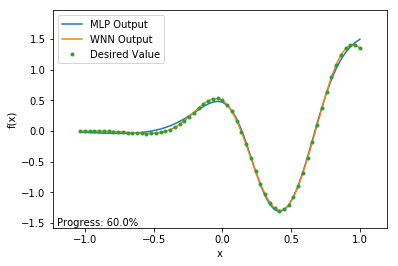

<Figure size 432x288 with 0 Axes>

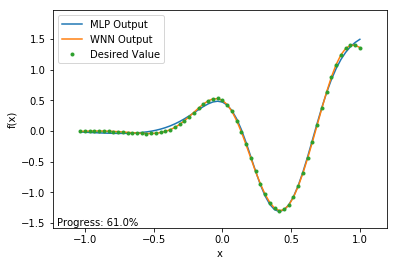

<Figure size 432x288 with 0 Axes>

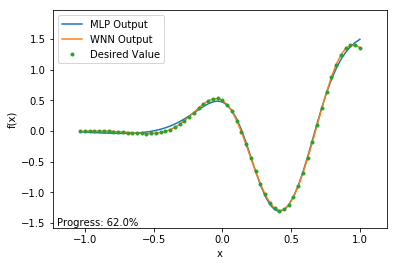

<Figure size 432x288 with 0 Axes>

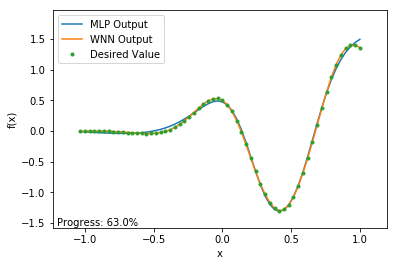

<Figure size 432x288 with 0 Axes>

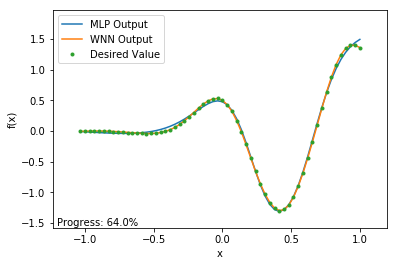

<Figure size 432x288 with 0 Axes>

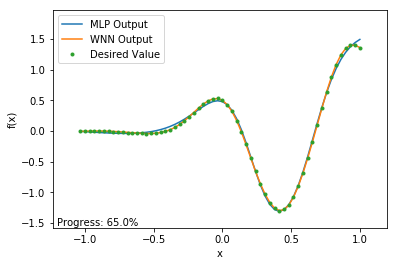

<Figure size 432x288 with 0 Axes>

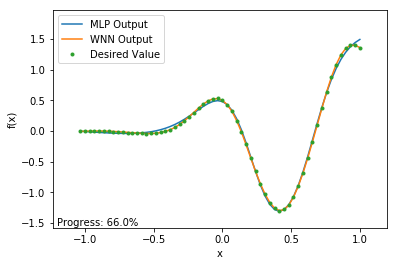

<Figure size 432x288 with 0 Axes>

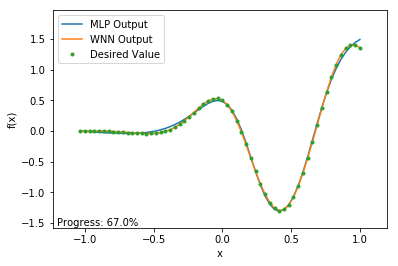

<Figure size 432x288 with 0 Axes>

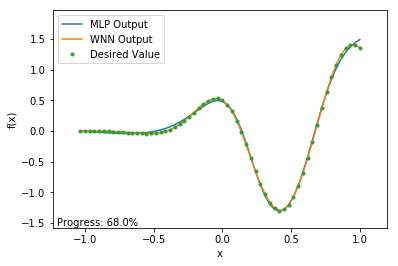

<Figure size 432x288 with 0 Axes>

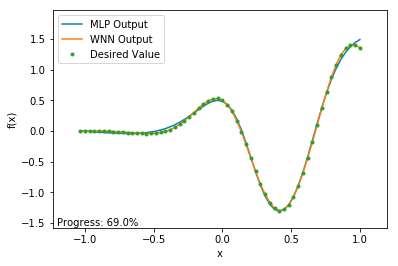

<Figure size 432x288 with 0 Axes>

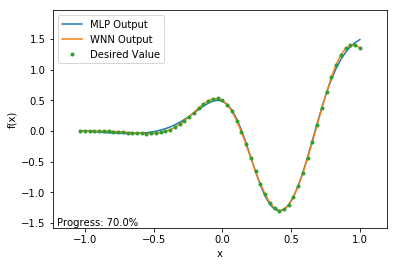

<Figure size 432x288 with 0 Axes>

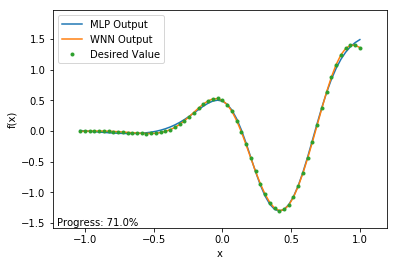

<Figure size 432x288 with 0 Axes>

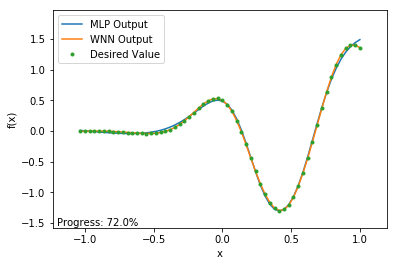

<Figure size 432x288 with 0 Axes>

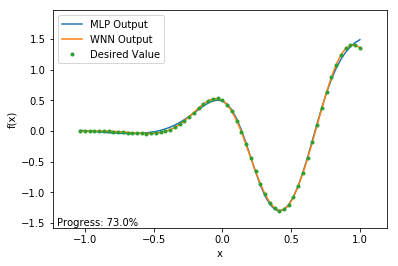

<Figure size 432x288 with 0 Axes>

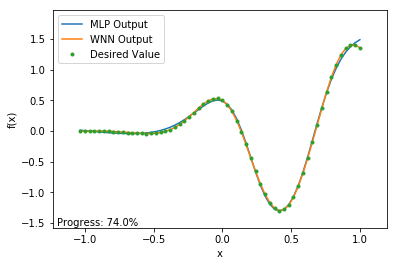

<Figure size 432x288 with 0 Axes>

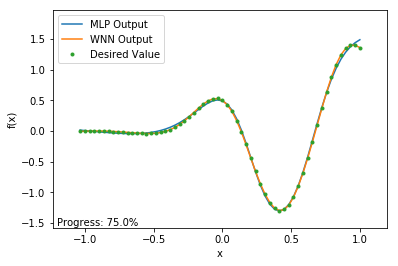

<Figure size 432x288 with 0 Axes>

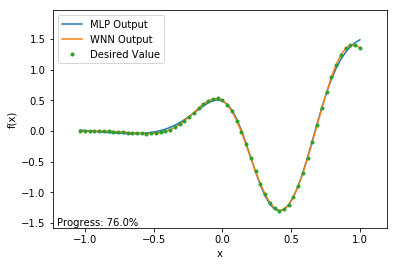

<Figure size 432x288 with 0 Axes>

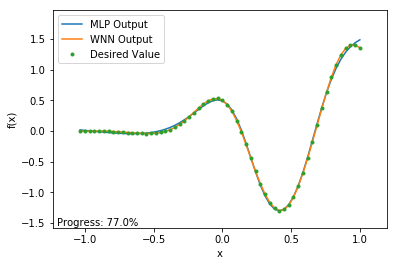

<Figure size 432x288 with 0 Axes>

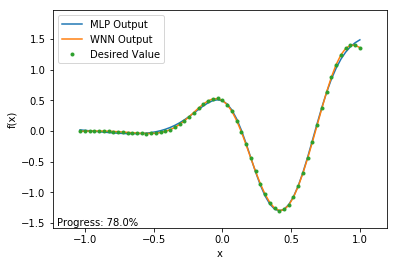

<Figure size 432x288 with 0 Axes>

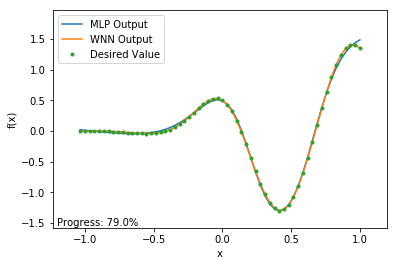

<Figure size 432x288 with 0 Axes>

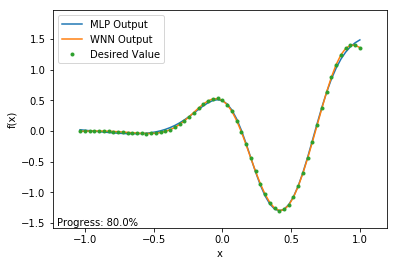

<Figure size 432x288 with 0 Axes>

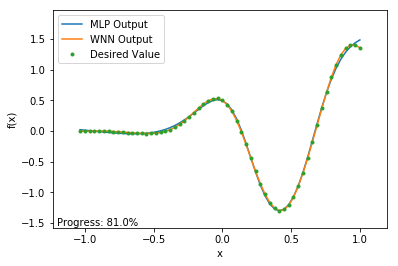

<Figure size 432x288 with 0 Axes>

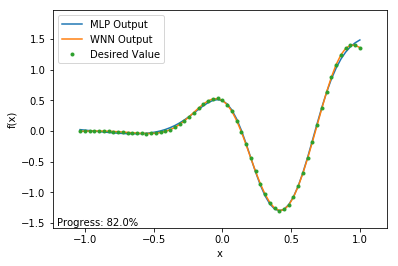

<Figure size 432x288 with 0 Axes>

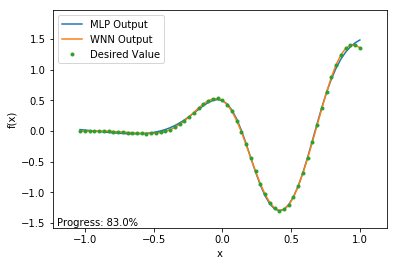

<Figure size 432x288 with 0 Axes>

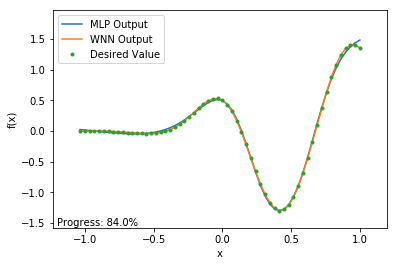

<Figure size 432x288 with 0 Axes>

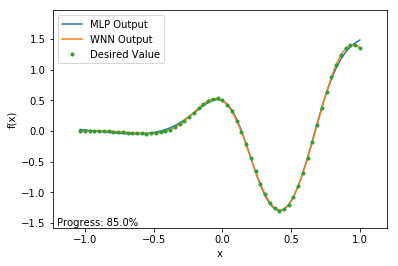

<Figure size 432x288 with 0 Axes>

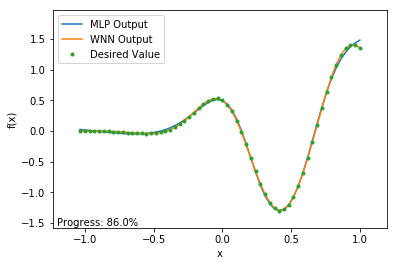

<Figure size 432x288 with 0 Axes>

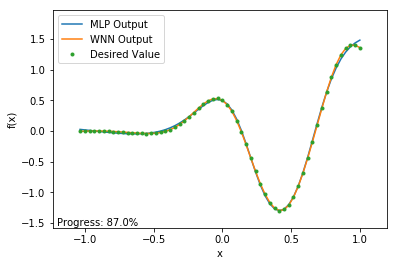

<Figure size 432x288 with 0 Axes>

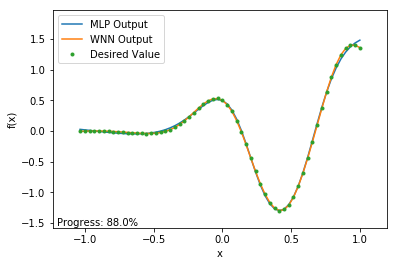

<Figure size 432x288 with 0 Axes>

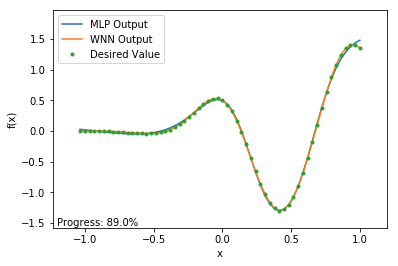

<Figure size 432x288 with 0 Axes>

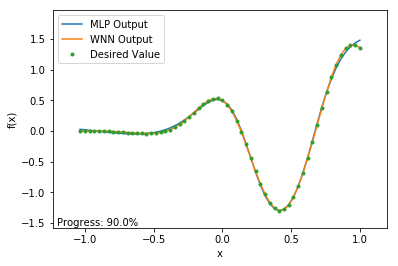

<Figure size 432x288 with 0 Axes>

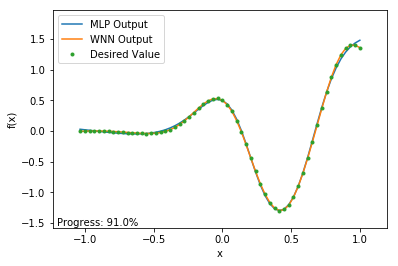

<Figure size 432x288 with 0 Axes>

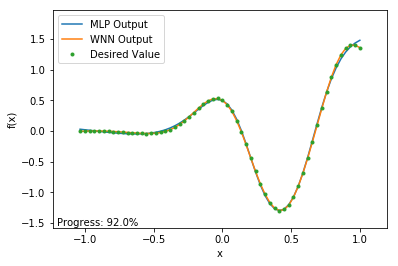

<Figure size 432x288 with 0 Axes>

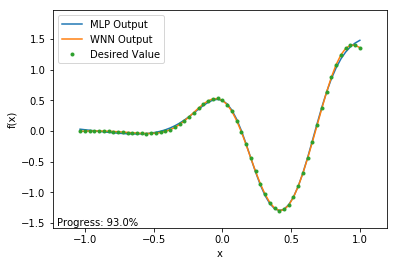

<Figure size 432x288 with 0 Axes>

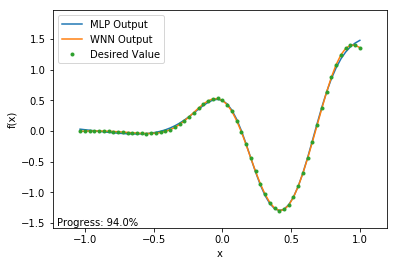

<Figure size 432x288 with 0 Axes>

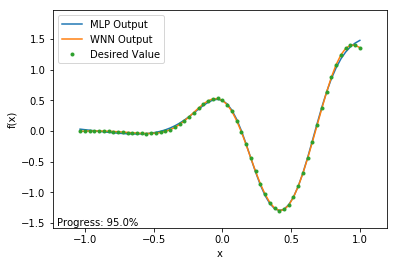

<Figure size 432x288 with 0 Axes>

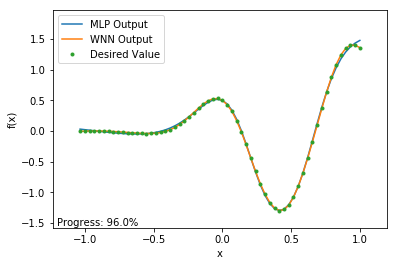

<Figure size 432x288 with 0 Axes>

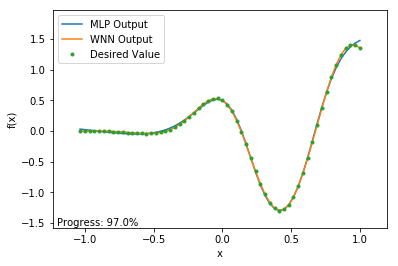

<Figure size 432x288 with 0 Axes>

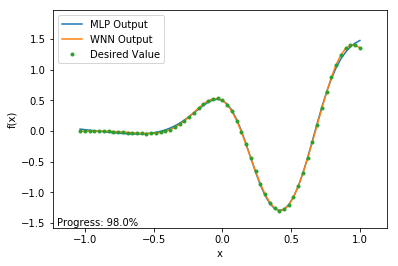

<Figure size 432x288 with 0 Axes>

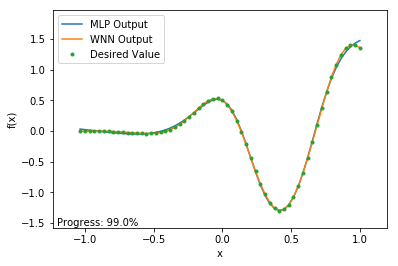

<Figure size 432x288 with 0 Axes>

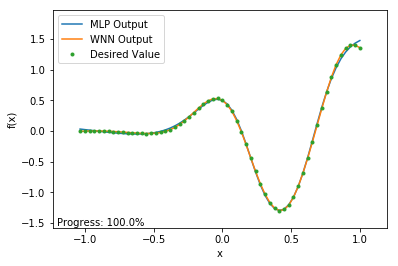

MSE MLP: 0.0003339328584201436
MSE WNN: 4.196652927209875e-06


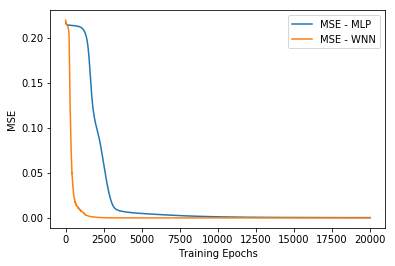

In [2]:
"""
#Based on the work of https://github.com/walissonsilva/wavelet-neural-network
#Modified by https://github.com/mk123qwe/wavelet-neural-network/
#add python 3 compability
"""

import matplotlib.pyplot as plt  # Para plotar graficos
import numpy as np  # Array do Python
#import pandas as pd
from math  import sqrt, pi

class WNN_MLP(object):
    def __init__(self, eta_mlp=0.01, eta_wnn=0.008, epoch_max=20000, Ni_mlp=2, Ni_wnn=1, Nh_mpl=5, Nh_wnn=40, Ns=1):
        ### Inicializando parametros
        # WNN
        self.Ni_wnn = Ni_wnn
        self.eta_wnn = eta_wnn
        self.Nh_wnn = Nh_wnn
        self.Aini = 0.01

        # MLP
        self.Ni_mlp = Ni_mlp
        self.Nh_mpl = Nh_mpl
        self.Wini = 0.5
        self.eta_mlp = eta_mlp

        # PARAMETROS COMUNS
        self.epoch_max = epoch_max
        self.Ns = Ns

    def load_first_function(self):
        x = np.arange(-6, 6, 0.2)
        self.N = x.shape[0]
        xmax = np.max(x)

        self.X_train = x / xmax
        self.d = 1 / (1 + np.exp(-1 * x))*(np.cos(x) - np.sin(x))
        #self.d = np.cos(x) + np.sin(x)

    def sig_dev2(self, theta):
        return 2*(1 / (1 + np.exp(-theta)))**3 - 3*(1 / (1 + np.exp(-theta)))**2 + (1 / (1 + np.exp(-theta)))

    def sig_dev3(self, theta):
        return -6*(1 / (1 + np.exp(-theta)))**4 + 12*(1 / (1 + np.exp(-theta)))**3 - 7*(1 / (1 + np.exp(-theta)))**2 + (1 / (1 + np.exp(-theta)))
    
    def train(self):
        ################ INICIALIZACAO WNN ###################

        ### Inicializando os pesos
        self.A = np.random.rand(self.Ns, self.Nh_wnn) * self.Aini

        ### Inicializando os centros
        self.t = np.zeros((1, self.Nh_wnn))

        idx = np.random.permutation(self.Nh_wnn)
        for j in range(self.Nh_wnn):
            self.t[0,j] = self.d[idx[j]]
        
        ### Inicializando as larguras
        self.R = abs(np.max(self.t) - np.min(self.t)) / 2

        MSE_wnn = np.zeros(self.epoch_max)

        ################ INICIALIZACAO MLP ###################

        self.Wji = np.random.rand(self.Nh_mpl, self.Ni_mlp) * self.Wini
        self.Wkj = np.random.rand(self.Ns, self.Nh_mpl + 1) * self.Wini

        MSE_mlp = np.zeros(self.epoch_max)

        plt.ion()

        for epoca in range(self.epoch_max):
            # WNN
            z_wnn = np.zeros(self.N)
            E_wnn = np.zeros(self.N)

            # MLP
            deltaWkj = deltaWji = 0
            z_mlp = np.zeros(self.N)
            E_mlp = np.zeros(self.N)

            index = np.random.permutation(self.N)

            for i in index:
                ################ REDE WNN ###################
                xi = self.X_train[i]#np.array([self.X_train[i]]).reshape(1, -1)
                theta = (xi - self.t) / self.R
                yj = self.sig_dev2(theta)
                z_wnn[i] = np.dot(self.A, yj.T)[0][0]

                e = self.d[i] - z_wnn[i]
                self.A = self.A + (self.eta_wnn * e * yj)
                self.t = self.t - (self.eta_wnn * e * self.A / self.R * self.sig_dev3(theta))
                self.R = self.R - (((self.eta_wnn * e * self.A * (xi - self.t)) / self.R**2) * self.sig_dev3(theta))

                E_wnn[i] = 0.5 * e**2
                ################## FIM WNN ####################

                ################ REDE MLP ###################
                xi = np.array([-1, self.X_train[i]]).reshape(1, -1)
                netj = np.dot(self.Wji, xi.T)
                yj = 1 / (1 + np.exp(-netj.T))
                yj_pol = np.insert(yj[0], 0, -1).reshape(1, -1)
                z_mlp[i] = np.dot(self.Wkj, yj_pol.T)[0][0]

                e = self.d[i] - z_mlp[i]
                etae = - self.eta_mlp * e
                deltaWkj -= np.dot(etae, yj_pol)
                deltaWji -= np.dot(etae * (self.Wkj[:,1:] * yj * (1 - yj)).T, xi)

                E_mlp[i] = 0.5 * e**2
                ################## FIM MLP ####################

            # WNN
            MSE_wnn[epoca] = np.sum(E_wnn) / self.N

            # MLP
            self.Wkj += deltaWkj
            self.Wji += deltaWji
            MSE_mlp[epoca] = np.sum(E_mlp) / self.N

            if (epoca % 200 == 0 or epoca == self.epoch_max - 1):
                if (epoca != 0):
                    plt.cla()
                    plt.clf()
                
                self.plot(z_wnn, z_mlp, epoca)


        
        print('MSE MLP:', MSE_mlp[-1])
        print('MSE WNN:', MSE_wnn[-1])

        plt.ioff()
        plt.figure(1)
        mse_mlp, = plt.plot(np.arange(0, MSE_mlp.size), MSE_mlp, label="mse_mlp")
        mse_wnn, = plt.plot(np.arange(0, MSE_wnn.size), MSE_wnn, label="mse_wnn")
        plt.legend([mse_mlp, mse_wnn], ['MSE - MLP', 'MSE - WNN'])
        plt.xlabel('Training Epochs')
        plt.ylabel('MSE')
        plt.show()

    def plot(self, saida_wnn, saida_mlp, epoca):
        plt.figure(0)
        y_mlp, = plt.plot(self.X_train, saida_mlp, label="y_mlp")
        y_wnn, = plt.plot(self.X_train, saida_wnn, label="y_wnn")
        d, = plt.plot(self.X_train, self.d, '.', label="d")
        plt.legend([y_mlp, y_wnn, d], ['MLP Output', 'WNN Output', 'Desired Value'])
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.text(np.min(self.X_train) - np.max(self.X_train) * 0.17  , np.min(self.d) - np.max(self.d) * 0.17, 'Progress: ' + str(round(float(epoca) / self.epoch_max * 100, 2)) + '%')
        plt.axis([np.min(self.X_train) - np.max(self.X_train) * 0.2, np.max(self.X_train) * 1.2, np.min(self.d) - np.max(self.d) * 0.2, np.max(self.d) * 1.4])
        plt.show()
        plt.pause(1e-100)

    def show_function(self):
        plt.figure(0)
        plt.title('Function')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.plot(self.X_train, self.d)
        plt.show()

wnn_mlp = WNN_MLP()

wnn_mlp.load_first_function()
wnn_mlp.train()